## Análisis EDA: Asignación

### 1. Carga de datos

In [30]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [31]:
compradores_df = pd.read_csv('../../data/Processed/All_Tables_Raw/comprador_data_Raw.csv')
compradores_df.to_parquet('../../data/Processed/parquet_files/comprador_data.parquet')

In [32]:
compradores_df = pd.read_parquet('../../data/Processed/parquet_files/comprador_data.parquet')

In [33]:
compradores_df.shape

(5484414, 16)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [34]:
compradores_df.head()

,cve_expediente,cve_contrato,identifier_id_inst,roles,name,identifier_legal_name,identifier_schema,identifier_uri,addres_country_name,addres_locality,address_postalcode,address_region,addres_streetaddress,contact_point_email,contact_point_name,contact_point_telephone
0,1892834,2038777.00,ISS6001015A3-051GYN085,buyer,Instituto de Seguridad y Servicios Sociales de...,ISSSTE-Hospital Regional Gral. Ignacio Zaragoz...,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Iztapalapa,9220,Ciudad de México,Calzada Ignacio Zaragoza No 1711 Col. Ejercito...,dulce.violante@issste.gob.mx,Dulce Idania Violante Medina,57165268
1,1892834,2038777.00,ISS6001015A3-051GYN085,procuringEntity,ISSSTE-Hospital Regional Gral. Ignacio Zaragoz...,ISSSTE-Hospital Regional Gral. Ignacio Zaragoz...,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Iztapalapa,9220,Ciudad de México,Calzada Ignacio Zaragoza No 1711 Col. Ejercito...,dulce.violante@issste.gob.mx,Dulce Idania Violante Medina,57165268
2,2010079,2186605.00,ISS6001015A3-051GYN035,buyer,Instituto de Seguridad y Servicios Sociales de...,"ISSSTE-Delegación Tabasco, Subdelegación de Ad...",MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Centro,86100,Tabasco,"Avenida Coronel Gregorio Méndez Magaña, No. 72...",itzel.marroquin@issste.gob.mx,Itzel Yuritzy Marroquin Rodríguez,993 3124249
3,2010079,2186605.00,ISS6001015A3-051GYN035,procuringEntity,"ISSSTE-Delegación Tabasco, Subdelegación de Ad...","ISSSTE-Delegación Tabasco, Subdelegación de Ad...",MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Centro,86100,Tabasco,"Avenida Coronel Gregorio Méndez Magaña, No. 72...",itzel.marroquin@issste.gob.mx,Itzel Yuritzy Marroquin Rodríguez,993 3124249
4,2039835,2591875.00,TGM990109718-004E2D001,buyer,Talleres Gráficos de México,TGM-Gerencia de Abastecimientos #004E2D001,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Cuauhtémoc,6280,Ciudad de México,"Avenida Canal del Norte No. 80, Colonia Felipe...",yadira.jimenez@tgm.com.mx,Yadira Jiménez Ramírez,57047400 Ext. 120


In [35]:
compradores_df.tail()

,cve_expediente,cve_contrato,identifier_id_inst,roles,name,identifier_legal_name,identifier_schema,identifier_uri,addres_country_name,addres_locality,address_postalcode,address_region,addres_streetaddress,contact_point_email,contact_point_name,contact_point_telephone
5484409,2571413,2987037.00,SAG941228M54-008000969,procuringEntity,SADER-EDMUNDO ESTEFAN GARFIAS #008000969,SADER-EDMUNDO ESTEFAN GARFIAS #008000969,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Mérida,97130,Yucatán,CALLE 2 A No 401 X 1 COLONIA DIAZ ORDAZ,admo@yct.sagarpa.gob.mx,EDMUNDO ESTEFAN GARFIAS,9999-430832
5484410,2571516,NaN,IIE751125JEA-018T0K001,buyer,Instituto Nacional de Electricidad y Energías ...,INEEL-Departamento de Adquisiciones #018T0K001,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Cuernavaca,62490,Morelos,"Reforma 113, Col Palmira",opileno@ineel.mx,Omar Pileño Gutiérrez,777 362 3811 Ext 7469
5484411,2571516,NaN,IIE751125JEA-018T0K001,procuringEntity,INEEL-Departamento de Adquisiciones #018T0K001,INEEL-Departamento de Adquisiciones #018T0K001,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Cuernavaca,62490,Morelos,"Reforma 113, Col Palmira",opileno@ineel.mx,Omar Pileño Gutiérrez,777 362 3811 Ext 7469
5484412,2571566,2987316.00,AFA191017KH8-009E00999,buyer,Agencia Federal de Aviación Civil,AFAC-Dirección de Administración #009E00999,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Álvaro Obregón,1010,Ciudad de México,"Boulevard Adolfo López Mateos 1990, Colonia Lo...",martha.leon@afac.gob.mx,Martha León García,55 55 57 93 00
5484413,2571566,2987316.00,AFA191017KH8-009E00999,procuringEntity,AFAC-Dirección de Administración #009E00999,AFAC-Dirección de Administración #009E00999,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MX,Álvaro Obregón,1010,Ciudad de México,"Boulevard Adolfo López Mateos 1990, Colonia Lo...",martha.leon@afac.gob.mx,Martha León García,55 55 57 93 00


#### 2.2 Información General

In [36]:
compradores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484414 entries, 0 to 5484413
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cve_expediente           int64  
 1   cve_contrato             float64
 2   identifier_id_inst       object 
 3   roles                    object 
 4   name                     object 
 5   identifier_legal_name    object 
 6   identifier_schema        object 
 7   identifier_uri           object 
 8   addres_country_name      object 
 9   addres_locality          object 
 10  address_postalcode       int64  
 11  address_region           object 
 12  addres_streetaddress     object 
 13  contact_point_email      object 
 14  contact_point_name       object 
 15  contact_point_telephone  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 669.5+ MB


#### 2.3 Estadísticas descriptivas

En este caso no hay estadísticas descriptivas porque no tenemos variables numéricas

### 3. Análisis Univariado

### 3.2 Variables Categóricas

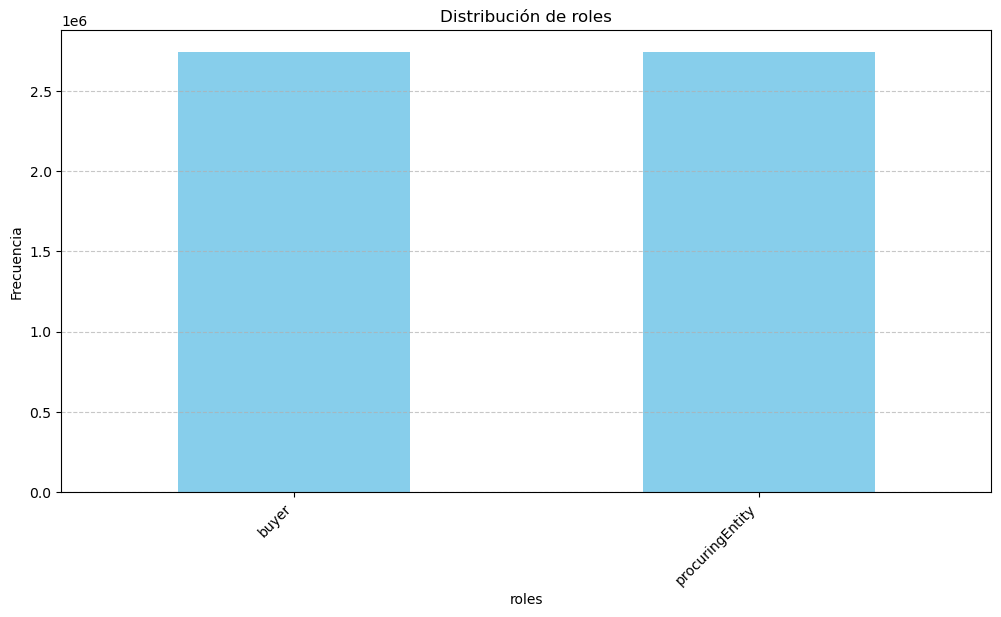

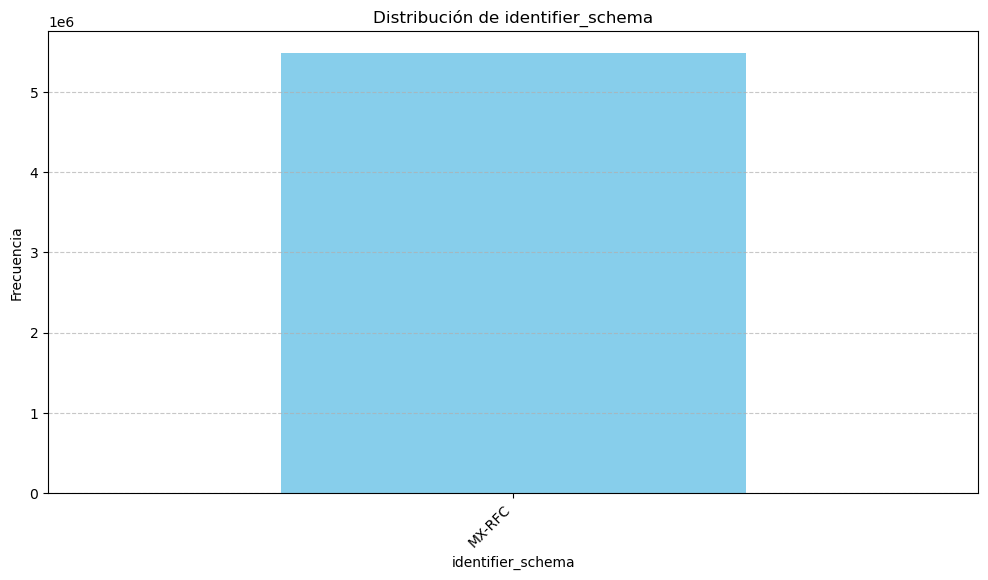

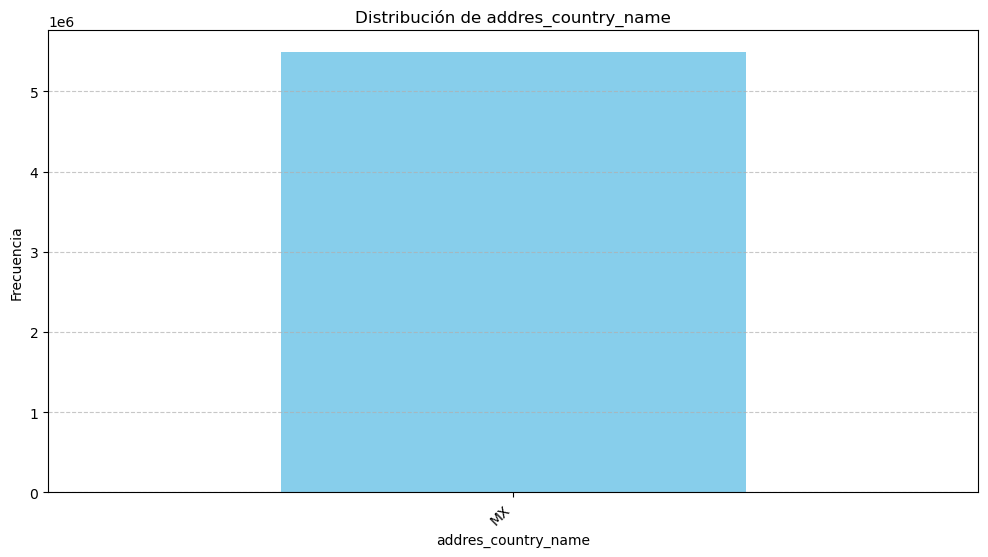

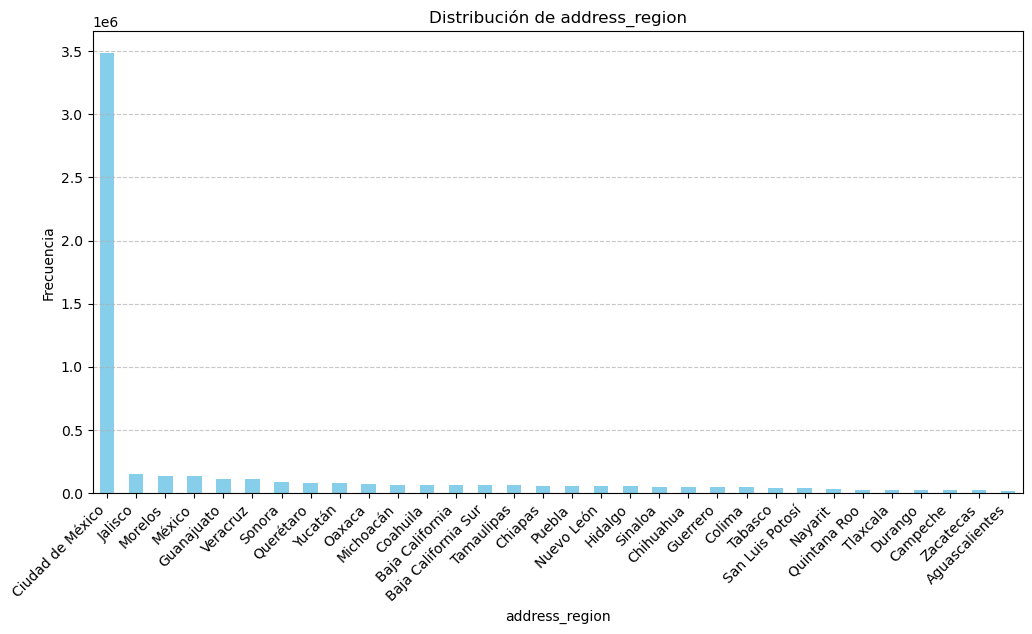

In [37]:
# Configuración para que los gráficos se vean más grandes
plt.rcParams.update({'figure.figsize': (12, 6)})

# Lista de columnas categóricas para las cuales queremos generar histogramas
categorical_columns = ['roles', 'identifier_schema', 'addres_country_name', 'address_region' ]

# Iterar a través de cada columna categórica y generar el histograma
for col in categorical_columns:
    plt.figure()
    compradores_df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### 5. Detección de Outliers

En este caso no hacemos detección de outliers porque el dataset no contiene variables numéricas

### 6. Análisis Multivariado

### 7. Preguntas de Negocio

#### 7.1 Top 10 compradores con más contratos

          identifier_id_inst  \
976   DIC860428M2A-008VSS998   
977   DIC860428M2A-008VSS998   
1147  IAA6210025R4-006A00997   
1146  IAA6210025R4-006A00997   
1666  IPN811229H26-011B01001   
1665  IPN811229H26-011B01001   
2993  SMA850101TQ4-013000999   
2992  SMA850101TQ4-013000999   
570   CNC881207TN3-048410003   
571   CNC881207TN3-048410003   

                                                   name  num_contratos  
976              DICONSA-Dirección Comercial #008VSS998          94591  
977                               Diconsa, S.A. de C.V.          94591  
1147  Instituto de Administración y Avalúos de Biene...          21140  
1146  INDAABIN-Dirección General de Avalúos y Obras ...          21140  
1666                                    XE-IPN Canal 11          12706  
1665  OnceTV-Dirección de Administración y Finanzas ...          12706  
2993                               Secretaría de Marina          10096  
2992  SEMAR-Dirección General Adjunta de Adquisicion...        

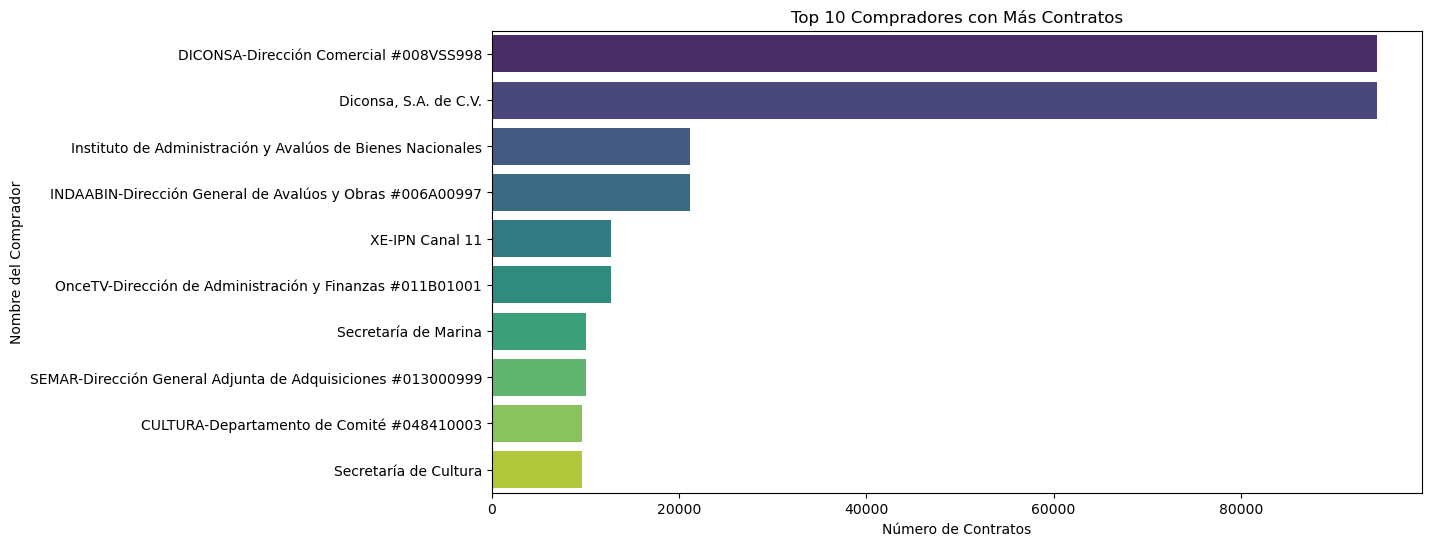

In [38]:
# Asegúrate de que la columna `cve_contrato` sea de tipo entero
compradores_df['cve_contrato'] = compradores_df['cve_contrato'].astype('Int64')

# Contar el número de contratos por comprador (identifier_id_inst)
contratos_por_comprador = compradores_df.groupby(['identifier_id_inst', 'name'])['cve_contrato'].nunique().reset_index()

# Renombrar la columna de conteo de contratos
contratos_por_comprador.columns = ['identifier_id_inst', 'name', 'num_contratos']

# Ordenar los compradores por el número de contratos en orden descendente
top_10_compradores = contratos_por_comprador.sort_values(by='num_contratos', ascending=False).head(10)

# Mostrar los resultados
print(top_10_compradores)

# Visualización opcional
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='num_contratos', y='name', data=top_10_compradores, palette='viridis')
plt.xlabel('Número de Contratos')
plt.ylabel('Nombre del Comprador')
plt.title('Top 10 Compradores con Más Contratos')
plt.show()


#### 7.2 Porcentaje de información faltante en datos de contacto

         address_region  email_faltante  telephone_faltante
0        Aguascalientes            0.00                0.00
1       Baja California            0.00                0.00
2   Baja California Sur            0.00                0.00
3              Campeche            0.00                0.00
4               Chiapas            0.00                0.00
5             Chihuahua            0.00                0.00
6      Ciudad de México            0.00                0.00
7              Coahuila            0.00                0.00
8                Colima            0.00                0.00
9               Durango            0.00                0.00
10           Guanajuato            0.00                0.00
11             Guerrero            0.00                0.00
12              Hidalgo            0.00                0.00
13              Jalisco            0.00                0.00
14            Michoacán            0.00                0.00
15              Morelos            0.00 

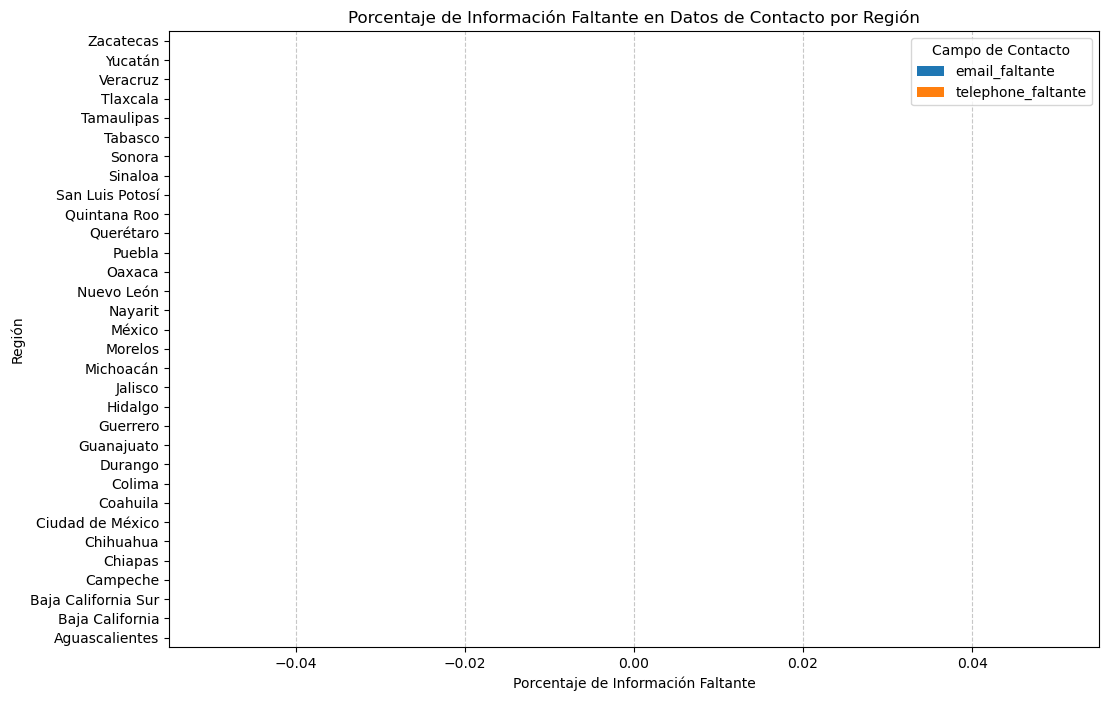

In [39]:
# Crear una función para calcular el porcentaje de valores faltantes
def calcular_porcentaje_faltante(df, columna):
    return df[columna].isnull().mean() * 100

# Crear columnas booleanas para verificar la presencia de datos de contacto
compradores_df['email_missing'] = compradores_df['contact_point_email'].isna() | (compradores_df['contact_point_email'] == '')
compradores_df['telephone_missing'] = compradores_df['contact_point_telephone'].isna() | (compradores_df['contact_point_telephone'] == '')

# Agrupar por 'address_region' y calcular el porcentaje de información faltante para cada campo de contacto
porcentaje_faltante_por_region = compradores_df.groupby('address_region').apply(lambda x: pd.Series({
    'email_faltante': x['email_missing'].mean() * 100,
    'telephone_faltante': x['telephone_missing'].mean() * 100
})).reset_index()

# Mostrar los resultados
print(porcentaje_faltante_por_region)

# Visualización opcional
import matplotlib.pyplot as plt

# Configuración de la visualización
fig, ax = plt.subplots(figsize=(12, 8))
porcentaje_faltante_por_region.plot(
    kind='barh',
    x='address_region',
    y=['email_faltante', 'telephone_faltante'],
    stacked=False,
    ax=ax,
    color=['#1f77b4', '#ff7f0e']
)

plt.xlabel('Porcentaje de Información Faltante')
plt.ylabel('Región')
plt.title('Porcentaje de Información Faltante en Datos de Contacto por Región')
plt.legend(title='Campo de Contacto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### 7.3 ¿Hay instituciones que aparecen frecuentemente tanto como comprador como entidad contratante?

In [41]:
# Filtrar las instituciones con el rol de 'buyer'
buyers = compradores_df[compradores_df['roles'].str.contains('buyer')]['identifier_legal_name'].unique()

# Filtrar las instituciones con el rol de 'procuringEntity'
procuring_entities = compradores_df[compradores_df['roles'].str.contains('procuringEntity')]['identifier_legal_name'].unique()

# Encontrar las instituciones que tienen ambos roles
common_institutions = set(buyers).intersection(set(procuring_entities))

# Mostrar las instituciones comunes
common_institutions_df = pd.DataFrame(common_institutions, columns=['identifier_legal_name'])
common_institutions_df['roles'] = 'buyer & procuringEntity'

print("Instituciones que tienen ambos roles (buyer y procuringEntity):")
common_institutions_df.head(10)

Instituciones que tienen ambos roles (buyer y procuringEntity):


,identifier_legal_name,roles
0,CMM-Dirección Corporativa de Adminsitración #0...,buyer & procuringEntity
1,INPSIQ-Subdirección de Recursos Materiales #01...,buyer & procuringEntity
2,NAFIN-Subdirección de Adquisiciones #006HIU001,buyer & procuringEntity
3,"CONAVI-Coordinación General de Administración,...",buyer & procuringEntity
4,IMSS-Departamento de Construcción y Planeación...,buyer & procuringEntity
5,SECTUR-Dirección General de Administración #02...,buyer & procuringEntity
6,INEGI-Coordinación Estatal Michoacán #040100982,buyer & procuringEntity
7,CFE-Departamento de Control Presupuestal y Ser...,buyer & procuringEntity
8,CONAGUA-Unidad Licitadora 164 #016B00060,buyer & procuringEntity
9,ASERCA-Dirección Regional Pacifico Sur #008F00997,buyer & procuringEntity


In [43]:
# Si quieres ver cuántas veces aparece cada institución con cada rol
roles_count_df = compradores_df[compradores_df['identifier_legal_name'].isin(common_institutions)].groupby(['identifier_legal_name', 'roles']).size().reset_index(name='count')

print("\nConteo de roles por institución:")
roles_count_df.sort_values(by="count", ascending = False).head(10)


Conteo de roles por institución:


,identifier_legal_name,roles,count
1165,DICONSA-Dirección Comercial #008VSS998,procuringEntity,389512
1164,DICONSA-Dirección Comercial #008VSS998,buyer,389512
1939,INDAABIN-Dirección General de Avalúos y Obras ...,procuringEntity,96746
1938,INDAABIN-Dirección General de Avalúos y Obras ...,buyer,96746
2184,IPN-Dirección de Recursos Materiales e Infraes...,buyer,92619
2185,IPN-Dirección de Recursos Materiales e Infraes...,procuringEntity,92619
2551,OnceTV-Dirección de Administración y Finanzas ...,procuringEntity,90613
2550,OnceTV-Dirección de Administración y Finanzas ...,buyer,90613
1936,INCMNSZ-Subdirección de Recursos Materiales y ...,buyer,58790
1937,INCMNSZ-Subdirección de Recursos Materiales y ...,procuringEntity,58790


#### 7.4 ¿Existen direcciones de correo electrónico (contact_point_email) duplicadas asociadas con diferentes entradas?

In [48]:
# Agrupar por 'contact_point_email' y contar el número de 'identifier_legal_name' únicos asociados a cada correo electrónico
email_group = compradores_df.groupby('contact_point_email')['identifier_legal_name'].nunique().reset_index()

# Filtrar los correos electrónicos que están asociados con más de un 'identifier_legal_name'
duplicated_emails = email_group[email_group['identifier_legal_name'] > 1]

print("Correos electrónicos duplicados asociados con diferentes 'identifier_legal_name':")
duplicated_emails.sort_values(by='identifier_legal_name', ascending= False).head(10)

Correos electrónicos duplicados asociados con diferentes 'identifier_legal_name':


,contact_point_email,identifier_legal_name
1775,uc@hacienda.gob.mx,41
497,enrique.caraveo@sct.gob.mx,4
1270,martin.alvarez@sct.gob.mx,4
1061,julio.huerta@sct.gob.mx,4
154,angel.devora@sct.gob.mx,4
1088,lcadenag@cultura.gob.mx,4
1432,ocoellod@sct.gob.mx,4
661,german.celis@imss.gob.mx,3
666,gfrancop@capufe.gob.mx,3
741,gutierrezm@diconsa.gob.mx,3
